In [ ]:
import numpy as np
import os, time
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic  # Holistic Model
mp_drawing = mp.solutions.drawing_utils  # Drawing Utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    # Colour Conversion
    image.flags.writeable = False
    results = model.process(image)       # Model Makes Prediction
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)    # Colour Re-conversion
    return image, results

In [4]:
def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

# Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [5]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.6) as holistic:
    while cap.isOpened():
        # Capture Video
        ret, frame = cap.read()

        # Detect Keypoints
        image, results = mediapipe_detection(frame, holistic)
        #print(results)

        # Draw Landmarks
        draw_landmarks(image, results)
        
        # Show Video
        cv2.imshow('OpenCV Webcam', image)
        # Quit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [6]:
landmarks = results.right_hand_landmarks.landmark

print(landmarks)

len(landmarks)

[x: 0.17534169554710388
y: 0.7030043601989746
z: 4.34094317824929e-07
, x: 0.24732044339179993
y: 0.6777312755584717
z: -0.017813408747315407
, x: 0.30095916986465454
y: 0.6189568638801575
z: -0.017755864188075066
, x: 0.33160167932510376
y: 0.5565986633300781
z: -0.018775049597024918
, x: 0.3507293462753296
y: 0.5033450126647949
z: -0.01834375411272049
, x: 0.26032477617263794
y: 0.5069630146026611
z: 0.021144814789295197
, x: 0.28880026936531067
y: 0.4358355402946472
z: 0.011407824233174324
, x: 0.30902791023254395
y: 0.39455336332321167
z: -0.0021452358923852444
, x: 0.32823866605758667
y: 0.3579215705394745
z: -0.01194792240858078
, x: 0.23116056621074677
y: 0.4836849272251129
z: 0.018882792443037033
, x: 0.25486788153648376
y: 0.4001002311706543
z: 0.010718517936766148
, x: 0.2741248607635498
y: 0.34770238399505615
z: -0.0025763327721506357
, x: 0.2935573160648346
y: 0.3051375150680542
z: -0.012067957781255245
, x: 0.20050425827503204
y: 0.475521981716156
z: 0.010579836554825306
,

21

In [7]:
frame

array([[[ 78,  92,  69],
        [ 78,  92,  69],
        [ 86, 100,  78],
        ...,
        [179, 155,  98],
        [178, 154,  97],
        [180, 157,  99]],

       [[ 84,  89,  74],
        [ 83,  88,  73],
        [ 88,  95,  76],
        ...,
        [173, 157,  82],
        [173, 156,  84],
        [175, 158,  86]],

       [[ 86,  89,  73],
        [ 86,  89,  73],
        [ 94,  99,  69],
        ...,
        [174, 158,  83],
        [176, 162,  82],
        [175, 161,  81]],

       ...,

       [[117, 101,  81],
        [123, 107,  86],
        [138, 105,  95],
        ...,
        [205, 125,  38],
        [195, 115,  28],
        [188, 108,  21]],

       [[129,  98,  81],
        [134, 103,  85],
        [137, 105,  92],
        ...,
        [205, 131,  47],
        [198, 123,  35],
        [191, 116,  28]],

       [[137,  98,  79],
        [142, 102,  84],
        [146, 106,  90],
        ...,
        [210, 129,  53],
        [202, 127,  32],
        [193, 118,  23]]

In [8]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

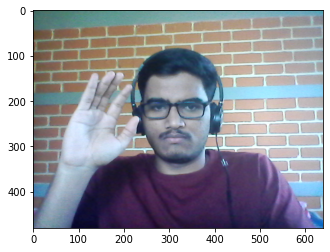

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

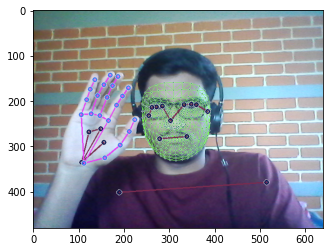

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [34]:
results.pose_landmarks

landmark {
  x: 0.4955359101295471
  y: 0.5113682150840759
  z: -1.199756145477295
  visibility: 0.9997830390930176
}
landmark {
  x: 0.5317476987838745
  y: 0.43818870186805725
  z: -1.1211634874343872
  visibility: 0.9994893074035645
}
landmark {
  x: 0.5552512407302856
  y: 0.4433688819408417
  z: -1.120876431465149
  visibility: 0.9995012283325195
}
landmark {
  x: 0.5775315165519714
  y: 0.44916045665740967
  z: -1.1205739974975586
  visibility: 0.9992729425430298
}
landmark {
  x: 0.4627362787723541
  y: 0.43680885434150696
  z: -1.1094287633895874
  visibility: 0.9996336102485657
}
landmark {
  x: 0.4418908953666687
  y: 0.4413435757160187
  z: -1.1079978942871094
  visibility: 0.9997057318687439
}
landmark {
  x: 0.4237365126609802
  y: 0.447517067193985
  z: -1.1083097457885742
  visibility: 0.9997005462646484
}
landmark {
  x: 0.6187140941619873
  y: 0.4870433211326599
  z: -0.6204143166542053
  visibility: 0.9991969466209412
}
landmark {
  x: 0.4034857749938965
  y: 0.497256

In [35]:
pose_landmarks = []
for data in results.pose_landmarks.landmark:
    temp = np.array([data.x, data.y, data.z, data.visibility])
    pose_landmarks.append(temp)

In [36]:
dir(results)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 'count',
 'face_landmarks',
 'index',
 'left_hand_landmarks',
 'pose_landmarks',
 'pose_world_landmarks',
 'right_hand_landmarks',
 'segmentation_mask']

In [37]:
len(results.face_landmarks.landmark)

468

In [38]:
len(results.pose_landmarks.landmark)

33

In [42]:
len(results.left_hand_landmarks.landmark)

21

In [43]:
# Function to extract landmarks and convert to matrix
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [44]:
extract_keypoints(results)

array([ 0.49553591,  0.51136822, -1.19975615, ...,  0.        ,
        0.        ,  0.        ])

In [45]:
# 468 points & x,y,z,visibility
n_face = 468 * 3 

# 33 points & x,y,z
n_pose = 33 * 4

# 21 points & x,y,z
n_lh = 21 * 3
n_rh = 21 * 3

print(n_face + n_pose + n_lh + n_rh)

1662


In [46]:
# These are keypoints captured in 1 frame --> Flattened Into 1D Array of length 1662
print(len(extract_keypoints(results)))

1662
